**Import Libraries**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/D3.csv"
df = pd.read_csv(url)

**Pre-processing**

In [11]:
x =  df.values[:, :3]
Y =  df.values[:, 3]
m = len(Y)

x0 = np.ones((m,1))
X = np.hstack((x0, x))
theta = np.zeros(4)

**Cost function algorithm**

In [12]:
def cost_function(X, Y, theta):
  h_theta = X.dot(theta)
  error = np.subtract(h_theta, Y)

  J = 1/(2*m) * np.sum(np.square(error))
  return J

**Gradient descent algorithm**

In [13]:
def gradient_descent(X, Y, theta, alpha, iterations):
  previous_costs = np.zeros(iterations)

  for i in range(iterations):
    h_theta = X.dot(theta)
    error = np.subtract(h_theta, Y)
    gradient = (1 / m) * X.transpose().dot(error)

    theta = theta - (alpha * gradient)

    previous_costs[i] = cost_function(X,Y,theta)
  return theta, previous_costs

In [14]:
iterations = 1500

alpha = 0.05
theta1, previous_costs = gradient_descent(X, Y, theta, alpha, iterations)

alpha2 = 0.1
theta2, previous_costs_2 = gradient_descent(X, Y, theta, alpha2, iterations)

alpha3 = 0.01
theta3, previous_costs_3 = gradient_descent(X, Y, theta, alpha3, iterations)

print('Linear Model for all variables: h(x) =')
print(theta1[0], '* x_0 +', theta1[1], '* x_1 +', theta1[2], '* x_2 +', theta1[3], '* x_3')

print('\nFinal cost:', previous_costs[iterations-1])

Linear Model for all variables: h(x) =
5.31128136151726 * x_0 + -2.0033116002156244 * x_1 + 0.533040198521228 * x_2 + -0.26517886428822757 * x_3
Final cost: 0.7384646851794184


**Prediction algorithm**

In [15]:
def predict(X, theta):
  predictedValue = theta[0] + theta[1]*X[0] + theta[2]*X[1] + theta[3]*X[2]
  return predictedValue

In [16]:
# Predict the value of y for new (X1, X2, X3) values
newX = [1, 1, 1]
print('\nGiven X:', newX, '... The predicted value of Y:', predict(newX, theta1))
newX = [2, 0, 4]
print('Given X:', newX, '... The predicted value of Y:', predict(newX, theta1))
newX = [3, 2, 1]
print('Given X:', newX, '... The predicted value of Y:', predict(newX, theta1))


Given X: [1, 1, 1] ... The predicted value of Y: 3.575831095534636
Given X: [2, 0, 4] ... The predicted value of Y: 0.2439427039331008
Given X: [3, 2, 1] ... The predicted value of Y: 0.10224809362461551


**Final Regression Model and Loss over Iteration for all inputs**

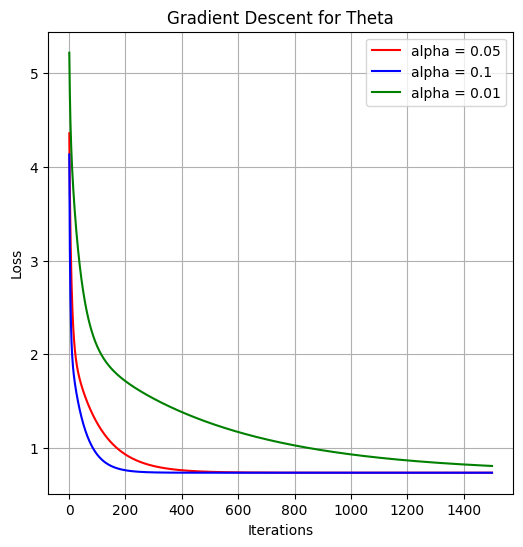

In [17]:
# Gradient Descent Plot
Iterations = range(1, iterations+1)

plt.plot(Iterations, previous_costs, color='red', label='alpha = 0.05')

# Gradient Descent Plot with different learning rates
plt.plot(Iterations, previous_costs_2, color='blue', label='alpha = 0.1')
plt.plot(Iterations, previous_costs_3, color='green', label='alpha = 0.01')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"] = (6,6)

plt.show()